In [ ]:
# Uploading the file from Local Drive on Customer Churn
from google.colab import files
uploaded = files.upload()

Saving employee_data.csv to employee_data.csv


In [ ]:
# Uploading the file from Local Drive on Customer Churn
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


# Data Declarations

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import InputLayer
from keras.layers import Dense
from keras.layers import Dropout



## Understanding Data

In [ ]:
dataset = pd.read_csv('employee_data.csv')
dataset.head(10)


,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0
5,140,sales,NaN,0.589097,4,NaN,medium,0.660020,Employed,4.0
6,121,sales,1.0,0.625399,3,NaN,low,0.835571,Employed,3.0
7,150,engineering,NaN,0.644586,4,NaN,low,0.796683,Employed,3.0
8,215,engineering,1.0,0.524114,3,NaN,medium,0.715005,Employed,7.0
9,269,support,NaN,0.909364,5,NaN,medium,0.994037,Employed,2.0


# Data Preprocessing

In [ ]:
dataset.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14249 non-null  int64  
 1   department         13540 non-null  object 
 2   filed_complaint    2058 non-null   float64
 3   last_evaluation    12717 non-null  float64
 4   n_projects         14249 non-null  int64  
 5   recently_promoted  300 non-null    float64
 6   salary             14249 non-null  object 
 7   satisfaction       14068 non-null  float64
 8   status             14249 non-null  object 
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


###Drop Department

In [ ]:


dataset.drop("department", axis= 1, inplace= True)



In [ ]:
dataset.head(10)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0
5,140,NaN,0.589097,4,NaN,medium,0.660020,Employed,4.0
6,121,1.0,0.625399,3,NaN,low,0.835571,Employed,3.0
7,150,NaN,0.644586,4,NaN,low,0.796683,Employed,3.0
8,215,1.0,0.524114,3,NaN,medium,0.715005,Employed,7.0
9,269,NaN,0.909364,5,NaN,medium,0.994037,Employed,2.0


In [ ]:
dataset['filed_complaint'] = dataset['filed_complaint'].fillna(0)
dataset['recently_promoted'] = dataset['recently_promoted'].fillna(0)
dataset['satisfaction'].dropna(axis =0, inplace= True)
dataset['last_evaluation'].dropna(axis =0, inplace= True)

dataset.dropna(axis = 0, inplace= True)
#['last_evaluation'] = dataset['last_evaluation'].fillna(dataset['last_evaluation'].median(), inplace=True)
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12717 entries, 0 to 14248
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    12717 non-null  int64  
 1   filed_complaint    12717 non-null  float64
 2   last_evaluation    12717 non-null  float64
 3   n_projects         12717 non-null  int64  
 4   recently_promoted  12717 non-null  float64
 5   salary             12717 non-null  object 
 6   satisfaction       12717 non-null  float64
 7   status             12717 non-null  object 
 8   tenure             12717 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 993.5+ KB


,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,0.0,0.932868,4,0.0,low,0.829896,Left,5.0
2,184,0.0,0.788830,3,0.0,medium,0.834988,Employed,3.0
3,206,0.0,0.575688,4,0.0,low,0.424764,Employed,2.0
4,249,0.0,0.845217,3,0.0,low,0.779043,Employed,3.0
5,140,0.0,0.589097,4,0.0,medium,0.660020,Employed,4.0


In [ ]:
dataset['status'].replace(["Employed", "Left"], [1, 0], inplace= True)
dataset.info()
dataset.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12717 entries, 0 to 14248
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    12717 non-null  int64  
 1   filed_complaint    12717 non-null  float64
 2   last_evaluation    12717 non-null  float64
 3   n_projects         12717 non-null  int64  
 4   recently_promoted  12717 non-null  float64
 5   salary             12717 non-null  object 
 6   satisfaction       12717 non-null  float64
 7   status             12717 non-null  int64  
 8   tenure             12717 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 993.5+ KB


,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,0.0,0.932868,4,0.0,low,0.829896,0,5.0
2,184,0.0,0.788830,3,0.0,medium,0.834988,1,3.0
3,206,0.0,0.575688,4,0.0,low,0.424764,1,2.0
4,249,0.0,0.845217,3,0.0,low,0.779043,1,3.0
5,140,0.0,0.589097,4,0.0,medium,0.660020,1,4.0
6,121,1.0,0.625399,3,0.0,low,0.835571,1,3.0
7,150,0.0,0.644586,4,0.0,low,0.796683,1,3.0
8,215,1.0,0.524114,3,0.0,medium,0.715005,1,7.0
9,269,0.0,0.909364,5,0.0,medium,0.994037,1,2.0
11,188,1.0,0.925480,6,0.0,low,0.481409,1,5.0


## Convert to One Hot Encoding

In [ ]:
dataset = pd.get_dummies(dataset)
dataset.head(10)
dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12717 entries, 0 to 14248
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    12717 non-null  int64  
 1   filed_complaint    12717 non-null  float64
 2   last_evaluation    12717 non-null  float64
 3   n_projects         12717 non-null  int64  
 4   recently_promoted  12717 non-null  float64
 5   satisfaction       12717 non-null  float64
 6   status             12717 non-null  int64  
 7   tenure             12717 non-null  float64
 8   salary_high        12717 non-null  uint8  
 9   salary_low         12717 non-null  uint8  
 10  salary_medium      12717 non-null  uint8  
dtypes: float64(5), int64(3), uint8(3)
memory usage: 931.4 KB


In [ ]:
print(dataset)

X= dataset.drop("status", axis = 1)
y=dataset.status

       avg_monthly_hrs  filed_complaint  last_evaluation  n_projects  \
0                  221              0.0         0.932868           4   
2                  184              0.0         0.788830           3   
3                  206              0.0         0.575688           4   
4                  249              0.0         0.845217           3   
5                  140              0.0         0.589097           4   
...                ...              ...              ...         ...   
14244              178              0.0         0.735865           5   
14245              257              0.0         0.638604           3   
14246              232              1.0         0.847623           5   
14247              130              0.0         0.757184           4   
14248              159              0.0         0.578742           3   

       recently_promoted  satisfaction  status  tenure  salary_high  \
0                    0.0      0.829896       0     5.0          

## Separate Training and Test Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train)
X_train.shape
print(y_train)
y_train.shape


[[ 0.41403847  2.45557544  0.52900838 ... -0.29403874 -0.96986488
   1.13801278]
 [ 1.20982284 -0.40723652  0.8717872  ... -0.29403874  1.03107147
  -0.87872475]
 [-1.11784645 -0.40723652  1.31202117 ... -0.29403874 -0.96986488
   1.13801278]
 ...
 [ 0.21509237 -0.40723652  0.03506421 ... -0.29403874 -0.96986488
   1.13801278]
 [-0.40164051 -0.40723652 -0.71483749 ... -0.29403874 -0.96986488
   1.13801278]
 [ 0.59308995 -0.40723652  1.62678122 ... -0.29403874 -0.96986488
   1.13801278]]
8770     1
6350     0
8756     1
12997    1
4822     1
        ..
13407    1
5845     0
6077     1
965      1
8183     0
Name: status, Length: 10173, dtype: int64


(10173,)

#Create the Artificial Neural Network Model in Keras

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=10, activation = 'relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = "binary_crossentropy", optimizer = 'RMSProp', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                176       
                                                                 
 dropout_12 (Dropout)        (None, 16)                0         
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dropout_13 (Dropout)        (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 16)                272       
                                                                 
 dropout_14 (Dropout)        (None, 16)                0         
                                                                 
 dense_18 (Dense)            (None, 16)               

In [ ]:
history = model.fit(X_train, y_train, validation_data =(X_test, y_test), epochs = 50, batch_size = 10)

Epoch 1/50
1018/1018 [==============================] - 4s 3ms/step - loss: 0.4195 - accuracy: 0.8000 - val_loss: 0.2768 - val_accuracy: 0.9308
Epoch 2/50
1018/1018 [==============================] - 3s 3ms/step - loss: 0.3102 - accuracy: 0.8920 - val_loss: 0.2108 - val_accuracy: 0.9403
Epoch 3/50
1018/1018 [==============================] - 2s 2ms/step - loss: 0.2728 - accuracy: 0.9103 - val_loss: 0.1917 - val_accuracy: 0.9497
Epoch 4/50
1018/1018 [==============================] - 2s 2ms/step - loss: 0.2591 - accuracy: 0.9218 - val_loss: 0.1847 - val_accuracy: 0.9465
Epoch 5/50
1018/1018 [==============================] - 2s 2ms/step - loss: 0.2470 - accuracy: 0.9266 - val_loss: 0.1761 - val_accuracy: 0.9520
Epoch 6/50
1018/1018 [==============================] - 4s 4ms/step - loss: 0.2429 - accuracy: 0.9291 - val_loss: 0.1736 - val_accuracy: 0.9564
Epoch 7/50
1018/1018 [==============================] - 3s 3ms/step - loss: 0.2345 - accuracy: 0.9321 - val_loss: 0.1754 - val_accuracy:

##Plot the Training and the Test Error

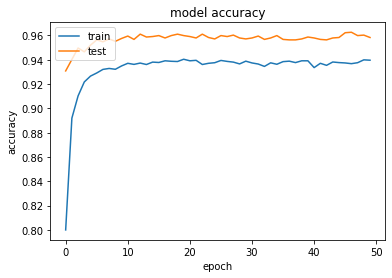

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [ ]:
y_prob = model.predict(X_test)
print(y_prob)
y_pred = np.where(y_prob > 0.5, 1,0)
print(y_pred)
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

80/80 [==============================] - 0s 1ms/step
[[0.9998557 ]
 [0.11546198]
 [0.9997792 ]
 ...
 [0.9999282 ]
 [0.933673  ]
 [0.7410674 ]]
[[1]
 [0]
 [1]
 ...
 [1]
 [1]
 [1]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       619
           1       0.96      0.99      0.97      1925

    accuracy                           0.96      2544
   macro avg       0.96      0.93      0.94      2544
weighted avg       0.96      0.96      0.96      2544

[[ 538   81]
 [  25 1900]]
